# Tech Assessment: Weather Trend Forecasting (Advanced Assessment)

## The PMAccelerator Mission

By making industry-leading tools and education available to individuals from all backgrounds, we level the playing field for future PM leaders. This is the PM Accelerator motto, as we grant aspiring and experienced PMs what they need most – Access. We introduce you to industry leaders, surround you with the right PM ecosystem, and discover the new world of AI product management skills.

## Project Objective:
Analyze the "Global Weather Repository.csv" dataset to forecast future weather trends and showcase data science skills through both basic and advanced techniques. This dataset provides Daily weather information for cities around the world. This dataset offers a comprehensive set of features that reflect the weather conditions worldwide. It includes over 40 features.


I will be using this notebook as my report for the submission.

## Libraries We Will Use

In [113]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Data Cleaning & Preprocessing

In [22]:
# Grabbing data
data=pd.read_csv('GlobalWeatherRepository.csv')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


Let's get some more details:

In [17]:
# Dataset structure
print(f'Dataset info: {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       29706 non-null  object 
 1   location_name                 29706 non-null  object 
 2   latitude                      29706 non-null  float64
 3   longitude                     29706 non-null  float64
 4   timezone                      29706 non-null  object 
 5   last_updated_epoch            29706 non-null  int64  
 6   last_updated                  29706 non-null  object 
 7   temperature_celsius           29706 non-null  float64
 8   temperature_fahrenheit        29706 non-null  float64
 9   condition_text                29706 non-null  object 
 10  wind_mph                      29706 non-null  float64
 11  wind_kph                      29706 non-null  float64
 12  wind_degree                   29706 non-null  int64  
 13  w

last_updated attribute is the Local date and time of the last data update in a specific location. Let's convert this to datetime format.

In [23]:
data_new = data.copy()
data_new['last_updated'] = pd.to_datetime(data_new['last_updated'])
print(f'Dataset info: {data_new.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       29706 non-null  object        
 1   location_name                 29706 non-null  object        
 2   latitude                      29706 non-null  float64       
 3   longitude                     29706 non-null  float64       
 4   timezone                      29706 non-null  object        
 5   last_updated_epoch            29706 non-null  int64         
 6   last_updated                  29706 non-null  datetime64[ns]
 7   temperature_celsius           29706 non-null  float64       
 8   temperature_fahrenheit        29706 non-null  float64       
 9   condition_text                29706 non-null  object        
 10  wind_mph                      29706 non-null  float64       
 11  wind_kph                    

Checking for missing values:

In [2]:
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

This a very rigorously maintained dataset hence no missing values.

Moving on to examining the presence of duplicates.

In [25]:
data_new[data_new.duplicated()]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


No duplicates either!

### Fixing discrepancies in categorical data

Let's start with country names.

In [27]:
data_new['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

After carefully parsing the list of countries (we had 205 names instead of 195) here's a list of the countries that are names incorrectly or exist in copies.
I'm actually not sure what some of these countries are supposed to be, so I'll try to deduce them from location names.

In [34]:
Wrong_Countries = ['USA United States of America', 'كولومبيا', 'Malásia', 'Гватемала', 'Турция', 
                  'Польша', 'Mexique', 'Polônia', 'Marrocos', 'Турция','Saudi Arabien', 'Südkorea', 'Bélgica', 'Turkménistan', 
                   '火鸡', 'Jemen', 'Südkorea','Inde', 'Estonie', 'Letonia', 'Saint-Vincent-et-les-Grenadines']
data_new[data_new['country'].isin(Wrong_Countries)]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


We have 21 rows in the dataset with incorrect country names, so let's fix those and rerun the above code cell to see the difference

In [33]:
data_new.iloc[7998,0] = 'United States of America'
data_new.iloc[8023,0] = 'United States of America'  
data_new.iloc[8083,0] = 'United States of America'  
data_new.iloc[11474,0] = 'Malaysia'  
data_new.iloc[11484,0] = 'Colombia'
data_new.iloc[11492,0] = 'Estonia'  
data_new.iloc[11504,0] = 'Republic of Guatemala'
data_new.iloc[11512,0] = 'India'
data_new.iloc[11525,0] = 'Latvia'
data_new.iloc[11526,0] = 'Lebanon'
data_new.iloc[11538,0] = 'Mexico'
data_new.iloc[11540,0] = 'Poland'
data_new.iloc[11543,0] = 'Morocco'
data_new.iloc[11547,0] = 'Turkey'
data_new.iloc[11565,0] = 'Saint Vincent and the Grenadines'
data_new.iloc[11568,0] = 'Saudi Arabia'
data_new.iloc[11577,0] = 'South Korea'
data_new.iloc[11581,0] = 'Belgium'
data_new.iloc[11588,0] = 'Turkmenistan'
data_new.iloc[11592,0] = 'Turkey'
data_new.iloc[11597,0] = 'Yemen'

Let's move on to the next category: location_names

In [35]:
data_new['location_name'].unique()

array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
       'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
       'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
       'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
       'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
       'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
       'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
       'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
       'Tegucigalpa', 'Buda

After extensive research I made the following list of names that are wrong or duplicates.

In [42]:
wrong_locations = ["'S Gravenjansdyk", 'Ivory Ivory Ban', 'Beijing Shi', 'Mexico (Grupo Mexico)', '-Kingdom']
data_new[data_new['location_name'].isin(wrong_locations)]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


16 rows that need to be fixed. Rerunning above code cell after.

In [41]:
data_new.iloc[3655,1] = "'S Gravenjansdijk"
data_new.iloc[3850,1] = "'S Gravenjansdijk"
data_new.iloc[4433,1] = "'S Gravenjansdijk"
data_new.iloc[4628,1] = "'S Gravenjansdijk"
data_new.iloc[4823,1] = "'S Gravenjansdijk"
data_new.iloc[5018,1] = "'S Gravenjansdijk"
data_new.iloc[5213,1] = "'S Gravenjansdijk"
data_new.iloc[5603,1] = "'S Gravenjansdijk"
data_new.iloc[5798,1] = "'S Gravenjansdijk"
data_new.iloc[6575,1] = "'S Gravenjansdijk"
data_new.iloc[6765,1] = "'S Gravenjansdijk"
data_new.iloc[6953,1] = "'S Gravenjansdijk"
data_new.iloc[11481,1] = 'Beijing'
data_new.iloc[11538,1] = 'Mexico City'
data_new.iloc[11592,1] = 'Istanbul'
data_new = data_new.drop(11474)  # Dropping row with location_name = 'Ivory Ivory Ban'

'condition_text' is another category with important categorical data that would help us with predictions.

In [43]:
data_new['condition_text'].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers'], dtype=object)

In [45]:
data_new['condition_text'].replace(['Partly cloudy','Patchy light rain in area with thunder', 'Light rain', 'Moderate or heavy rain in area with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'],
                                 ['Partly Cloudy', 'Patchy light rain with thunder', 'Light rain shower', 'Moderate or heavy rain with thunder', 'Thunder outbreaks in nearby', 'Thunder outbreaks possible'], inplace=True)

Wind direction next.

In [46]:
data_new['wind_direction'].unique()

array(['NNW', 'NW', 'W', 'SW', 'SSE', 'E', 'N', 'SE', 'ESE', 'NNE', 'S',
       'WSW', 'SSW', 'ENE', 'NE', 'WNW'], dtype=object)

Everything is in order here.

### Outlier Detection

I will be using Isolation forests for outlier detection.

In [100]:
data_new = data_new.reset_index(drop = False)

C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yashn\OneDrive\Documents\AISC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yashn\OneDrive\D

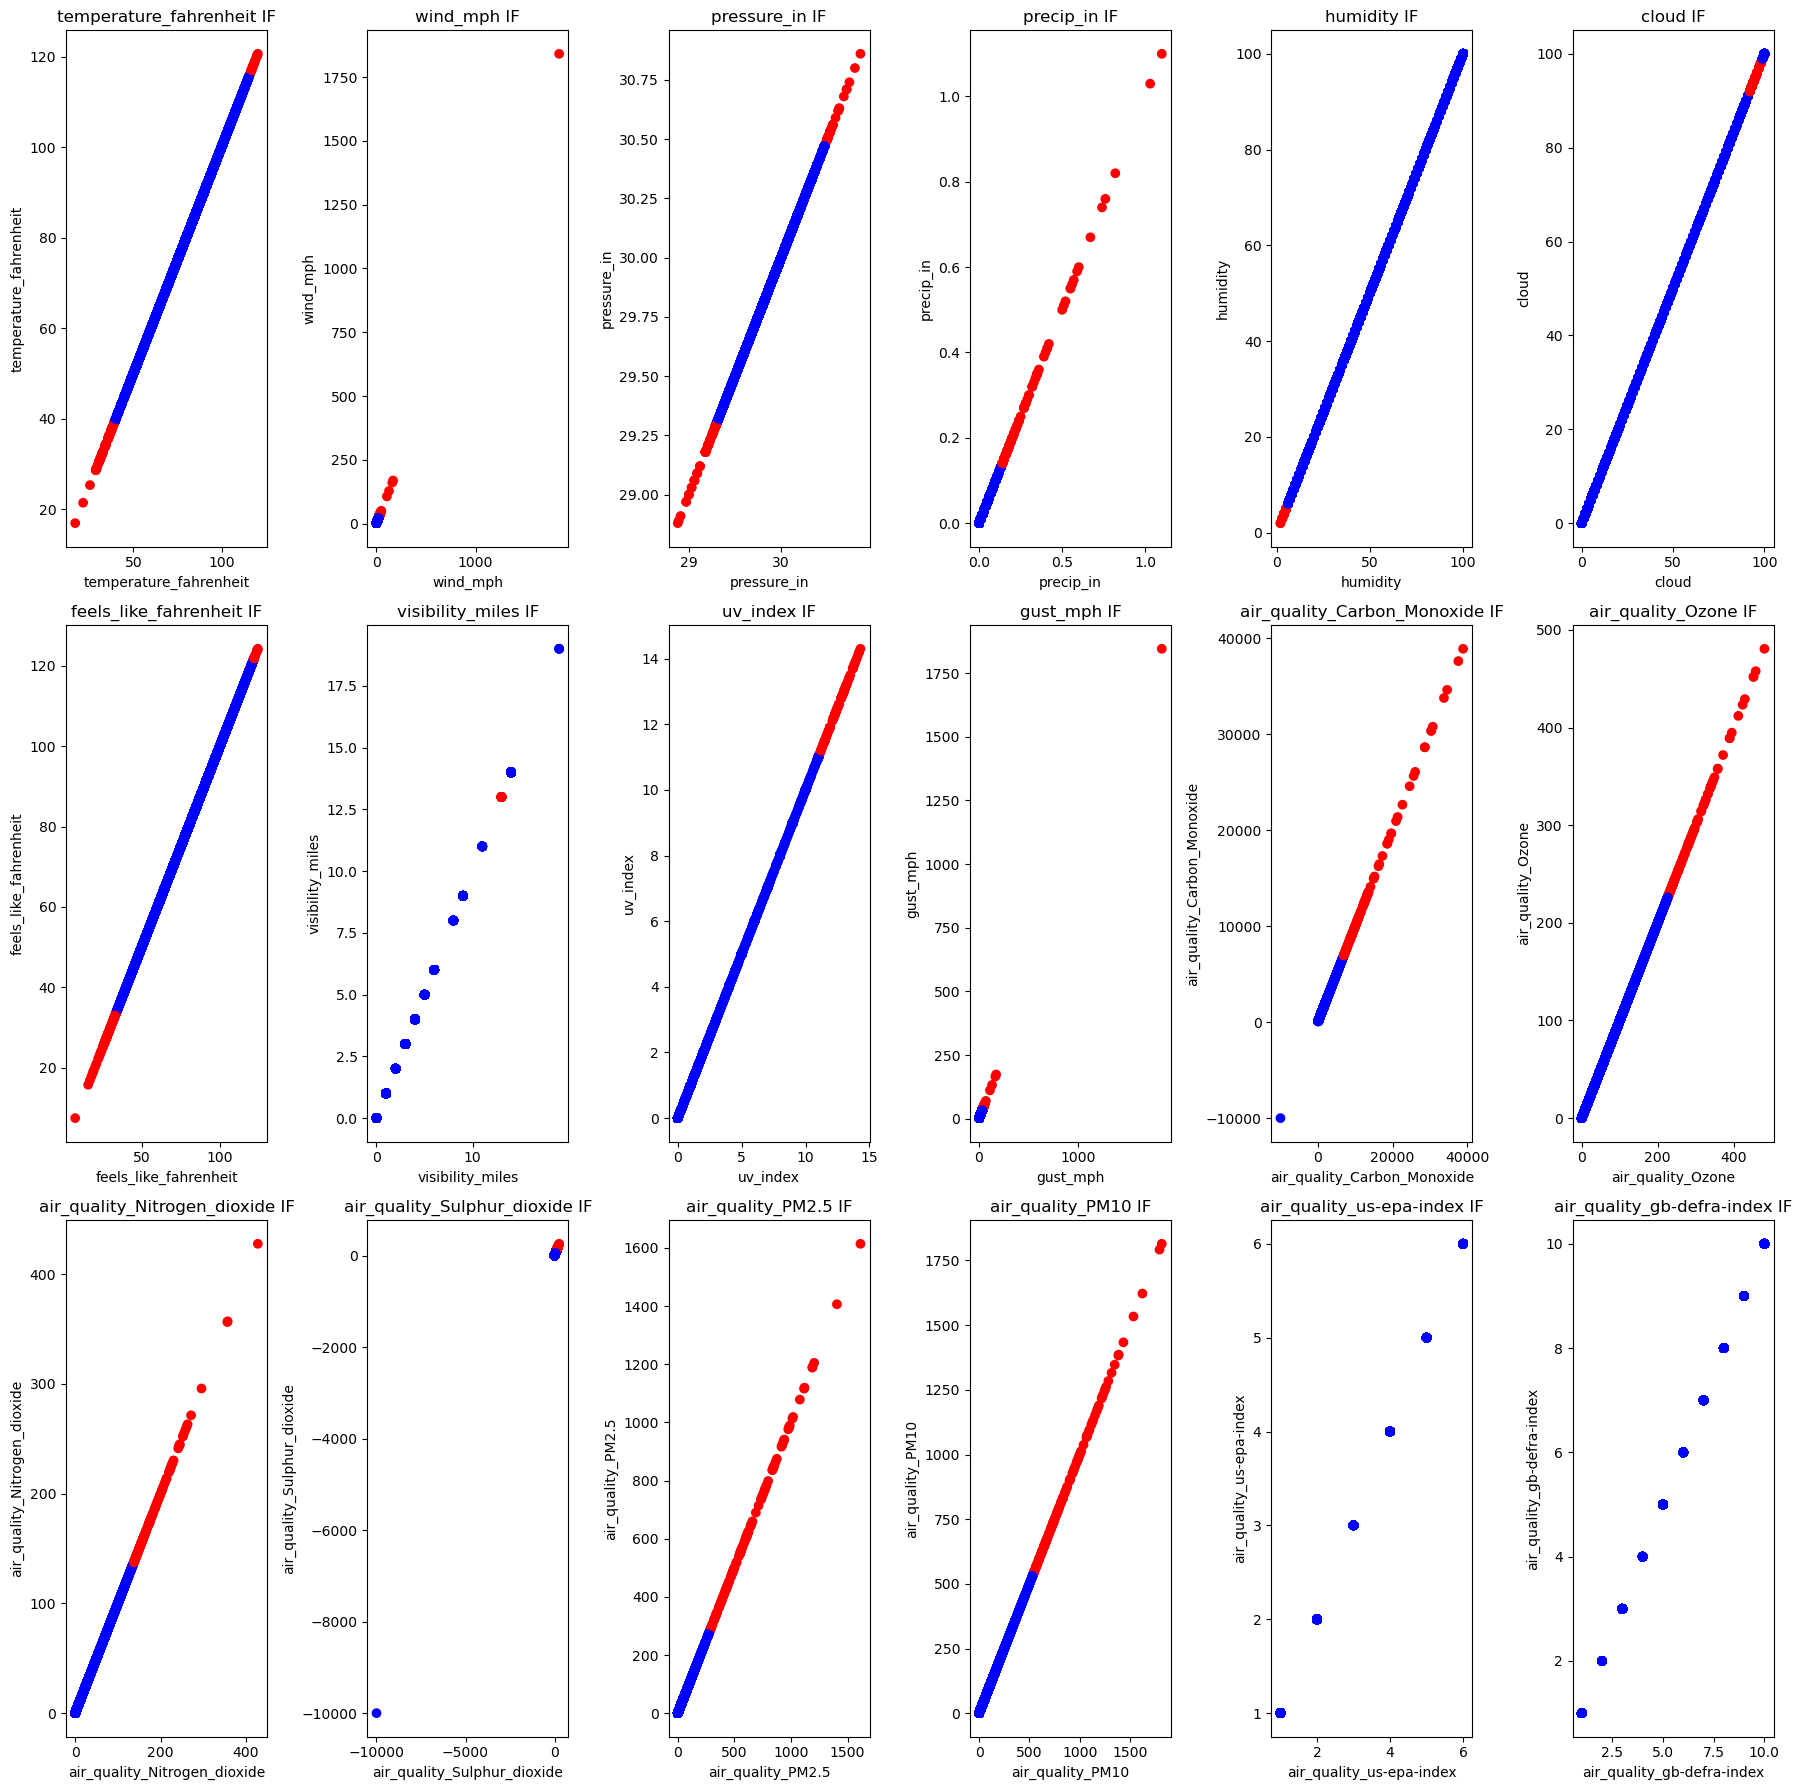

In [101]:
# Selecting numeric features
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']

# Create an empty list to store the Isolation Forest models
models = []

# Create and fit an Isolation Forest model for each feature
for feature in features:
    X = data_new[[feature]] 
    model = IsolationForest(contamination=0.005)  # Adjust contamination as needed
    model.fit(X)
    models.append(model)

# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=3, ncols = 6, figsize=(18, 18))
# Predict outliers for all features
outlier_labels = []
for i, feature in enumerate(features):
    row = i // 6
    col = i % 6
    X = data_new[[feature]]
    y_pred = models[i].predict(X)
    outlier_labels.append(y_pred)

    # Color-code data points based on outlier status
    colors = ['blue' if label == 1 else 'red' for label in y_pred]

    axes[row, col].scatter(X, X, c=colors)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"{feature} IF")

plt.tight_layout()
plt.show()

# Create a boolean mask for inliers (True) and outliers (False)
inlier_mask = np.all(np.array(outlier_labels) == 1, axis=0)

Something very interesting about analyzing outliers for weather data gives us an idea about the frequency of natural disasters or the impact of global warming and pollution.

For example, take a look at the scatter plot in row 3, column 3: air_quality_PM2.5. You can see that many points are categorized as outliers in this case but these are a result of pollution. Of course there are actually outliers due to incorrect data input as well (highest value in row 1, column 2 for wind_mph is far beyond what has ever been recorded), so for this project, I am going to weed out these outliers because I am not meteorologist and don't have a deeper understanding of these factors.

I am going to aim to create a forecasting model by getting rid of the outliers and finding the correlation between the features.

In [102]:
# Filter the DataFrame to keep only inliers
X = data_new[features]
data_filtered = X[inlier_mask] 
data_filtered.info()
# Now data_filtered contains data without the outliers 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28164 entries, 0 to 29703
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature_fahrenheit        28164 non-null  float64
 1   wind_mph                      28164 non-null  float64
 2   pressure_in                   28164 non-null  float64
 3   precip_in                     28164 non-null  float64
 4   humidity                      28164 non-null  int64  
 5   cloud                         28164 non-null  int64  
 6   feels_like_fahrenheit         28164 non-null  float64
 7   visibility_miles              28164 non-null  float64
 8   uv_index                      28164 non-null  float64
 9   gust_mph                      28164 non-null  float64
 10  air_quality_Carbon_Monoxide   28164 non-null  float64
 11  air_quality_Ozone             28164 non-null  float64
 12  air_quality_Nitrogen_dioxide  28164 non-null  float64
 13  a

In [104]:
data_new = data_new[data_new.index.isin(data_filtered.index)]
# Keeping the whole dataset upto date.

## EDA

In this section I am going to uncover the correlation between various features of the dataset and also just get insights into important weather trends across the globe

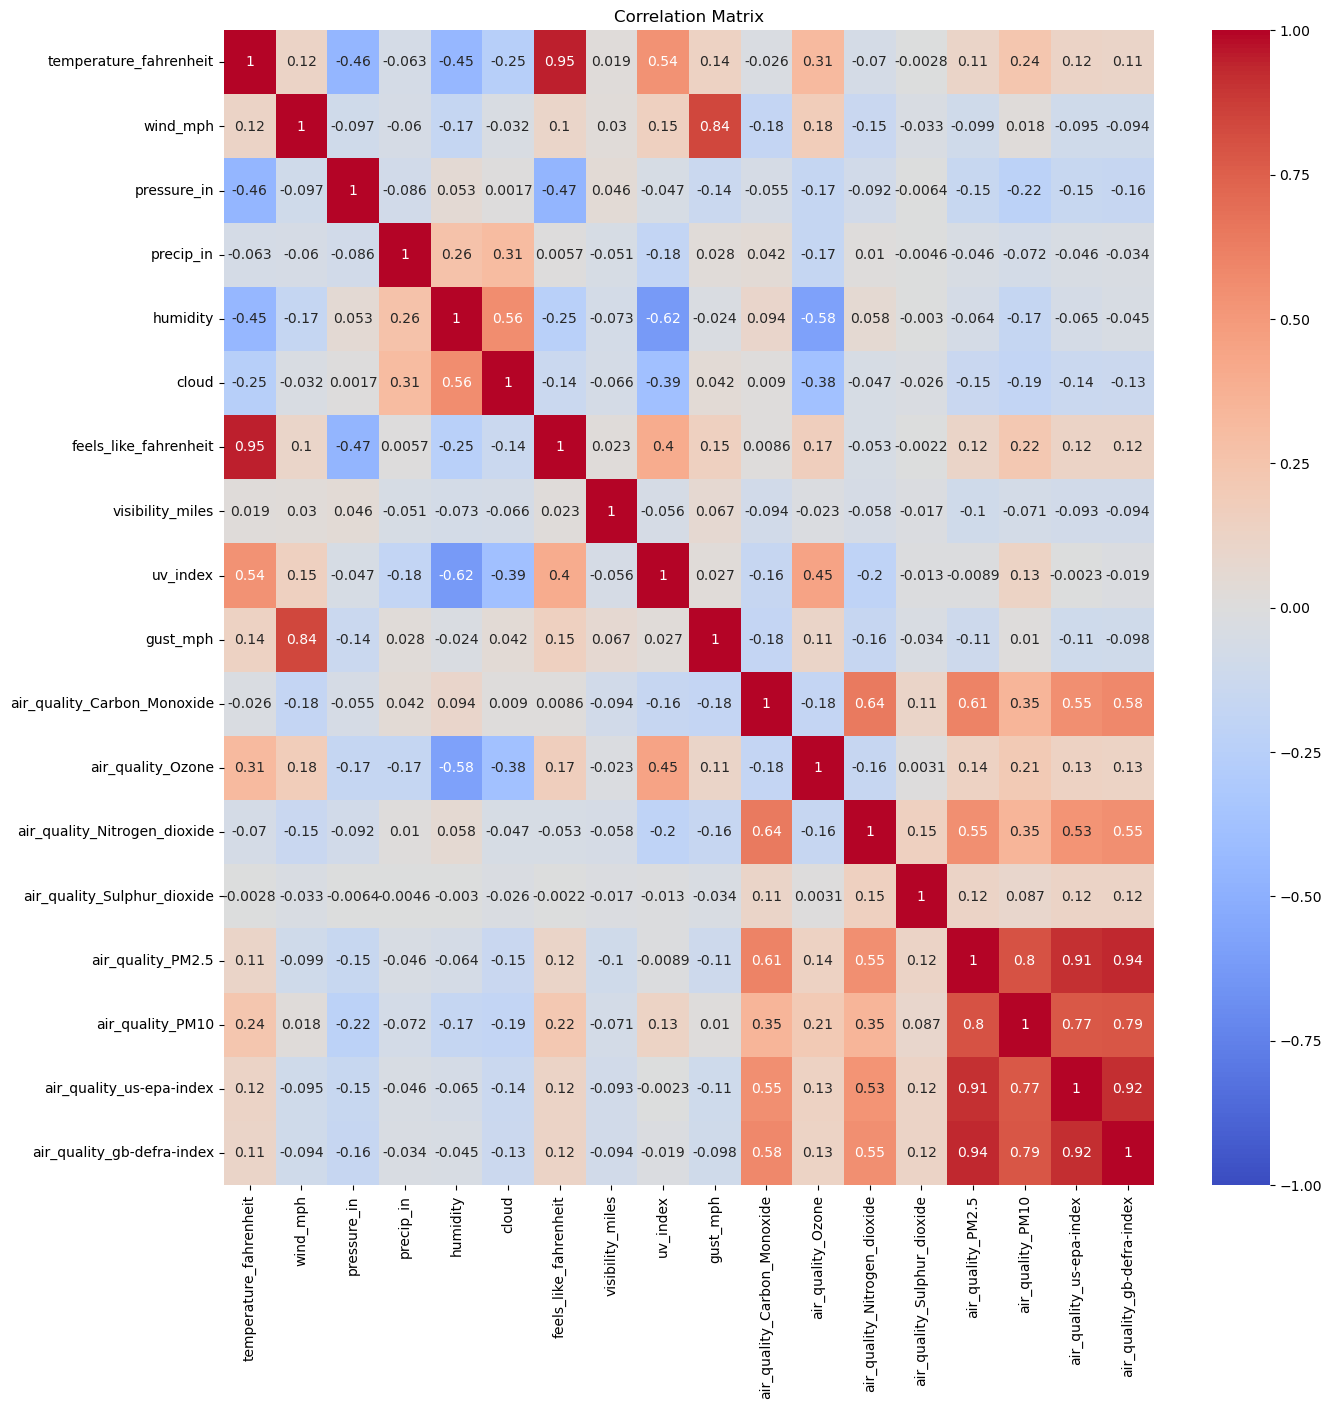

In [80]:
# Calculate the correlation matrix
correlation_matrix = data_filtered.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

While this correlation map gives us an idea of the features that are mroe correlated than others and ones that obviously helped in predicting weather conditions (like temperature being 54% correlated to UV index), the large number of them requires us to streamline for our purposes.

This is why I'm going to use a random forest to create a list of features that are more important for forecasting purposes.

                         feature  importance
0                          cloud    0.463413
1                       uv_index    0.073197
2                       humidity    0.071865
3               visibility_miles    0.049682
4         temperature_fahrenheit    0.036929
5              air_quality_Ozone    0.036123
6          feels_like_fahrenheit    0.032154
7                      precip_in    0.031666
8                    pressure_in    0.028314
9   air_quality_Nitrogen_dioxide    0.026851
10   air_quality_Carbon_Monoxide    0.026048
11                      gust_mph    0.025673
12              air_quality_PM10    0.024147
13             air_quality_PM2.5    0.023072
14   air_quality_Sulphur_dioxide    0.022365
15                      wind_mph    0.021514
16    air_quality_gb-defra-index    0.004234
17      air_quality_us-epa-index    0.002754


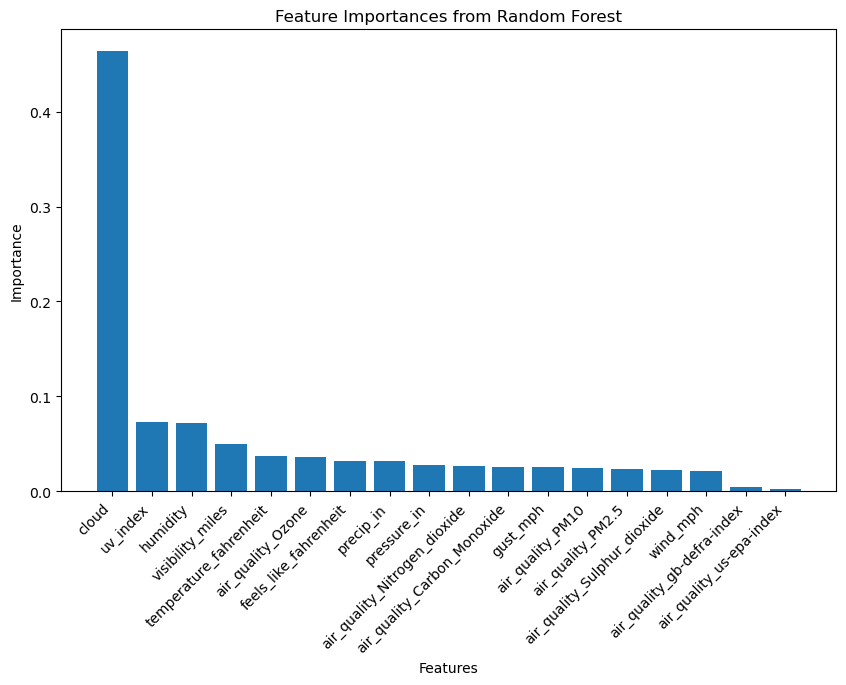

In [106]:
X = data_filtered # Replace 'target_column' with your actual target column name
y = data_new['condition_text']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': X.columns[indices],
                                    'importance': importances[indices]})

# Print feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

## Model Creation

I am going to use the below listed features to create a Catboost model. Catboost is an ensemble learning algorithm that uses a host of different ML models to create a predictive outcome.

In [109]:
# Here is the list of important features which I will use to build our models:
forecasting_features = ['temperature_fahrenheit', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'visibility_miles', 
                        'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Nitrogen_dioxide']

In [115]:
# Assuming your data is in a pandas DataFrame named 'df'
# 'X' contains the features, 'y' contains the target variable

X = data_filtered[forecasting_features]  # Replace 'target_variable' with your actual target column name
y = data_new['condition_text']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Identify categorical features (if any)
cat_features = list(X_train.select_dtypes(include=['category', 'object']).columns) 

# Create and train the CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=1000,  # Adjust as needed
    learning_rate=0.1,  # Adjust as needed
    depth=6,          # Adjust as needed
    random_seed=42,
    cat_features=cat_features  # Specify categorical features
)
# Train the CatBoost model using the encoded target variable
cat_model.fit(X_train, y_train_encoded, eval_set=(X_test, y_test_encoded), verbose=100)
# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_encoded, y_pred)
rmse = mean_squared_error(y_test_encoded, y_pred, squared=False)
r2 = r2_score(y_test_encoded, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

0:	learn: 4.7934491	test: 4.8775255	best: 4.8775255 (0)	total: 4.96ms	remaining: 4.96s
100:	learn: 2.3631274	test: 2.5486553	best: 2.5486553 (100)	total: 465ms	remaining: 4.14s
200:	learn: 2.2175433	test: 2.4711562	best: 2.4710980 (197)	total: 933ms	remaining: 3.71s
300:	learn: 2.1270675	test: 2.4462507	best: 2.4462507 (300)	total: 1.34s	remaining: 3.1s
400:	learn: 2.0511764	test: 2.4279180	best: 2.4279180 (400)	total: 1.71s	remaining: 2.56s
500:	learn: 1.9866802	test: 2.4232071	best: 2.4214578 (477)	total: 2.11s	remaining: 2.1s
600:	learn: 1.9316709	test: 2.4253781	best: 2.4214578 (477)	total: 2.5s	remaining: 1.66s
700:	learn: 1.8793513	test: 2.4232588	best: 2.4214578 (477)	total: 2.88s	remaining: 1.23s
800:	learn: 1.8324814	test: 2.4181473	best: 2.4181473 (800)	total: 3.26s	remaining: 811ms
900:	learn: 1.7902169	test: 2.4152749	best: 2.4148086 (847)	total: 3.7s	remaining: 406ms
999:	learn: 1.7529188	test: 2.4164427	best: 2.4141869 (920)	total: 4.1s	remaining: 0us

bestTest = 2.414186